<a href="https://colab.research.google.com/github/Yoavvvvvv/Computer-vision/blob/main/CIFAR10_with_vgg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Initial TensorFlow Import
import tensorflow as tf
import tensorflow_datasets
from tensorflow import keras

In [ ]:
#Additional Imports
from keras.layers import Input, Dense, Conv2D, Flatten, Dropout, BatchNormalization, MaxPooling2D
import numpy as np
from keras.models import Model
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator

#imports for vgg
from keras import layers
import keras.models as models
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import to_categorical

In [ ]:
#Load In The Data
cifar10 = tf.keras.datasets.cifar10.load_data()

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
x_train , x_test = x_train/255.0 , x_test/255.0
y_train, y_test = y_train.flatten() , y_test.flatten()

170498071/170498071 [==============================] - 6s 0us/step


In [ ]:
print('x_train shape: ', x_train.shape, '\ny_train shape: ', y_train.shape,
      '\nx_test.shape: ', x_test.shape, '\ny_test shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3) 
y_train shape:  (50000,) 
x_test.shape:  (10000, 32, 32, 3) 
y_test shape:  (10000,)


In [ ]:
#Number of classes
K = len(set(y_train))
print('Number of classes: ', K)

Number of classes:  10


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
#Build the VGG model using the functional API
vgg = VGG16(input_shape = (32,32,3), weights = 'imagenet', include_top = False)

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False

custom_vgg = models.Sequential()
custom_vgg.add(vgg)
custom_vgg.add(layers.Flatten())
custom_vgg.add(layers.Dense(256, activation='relu'))
custom_vgg.add(layers.Dropout(0.5))
custom_vgg.add(layers.Dense(10, activation='softmax'))  # 10 classes in CIFAR-10


custom_vgg.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 512)               0         
                                                                 
 dense (Dense)               (None, 256)               131328    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 14848586 (56.64 MB)
Trainable params: 133898 (523.04 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [ ]:
custom_vgg.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = 'accuracy')

In [ ]:
#r = model.fit_generator(model, gen, len(x_train)/batch_size, epochs, validation_data = (x_test,y_test))
categorical_y_train = to_categorical(y_train, num_classes = 10)
categorical_y_test = to_categorical(y_test, num_classes = 10)

history = custom_vgg.fit(x_train,categorical_y_train, epochs=10, validation_data=(x_test, categorical_y_test))

Epoch 1/10
1563/1563 [==============================] - 16s 8ms/step - loss: 1.4942 - accuracy: 0.4771 - val_loss: 1.3262 - val_accuracy: 0.5307
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.3219 - accuracy: 0.5431 - val_loss: 1.2606 - val_accuracy: 0.5575
Epoch 3/10
1563/1563 [==============================] - 15s 10ms/step - loss: 1.2861 - accuracy: 0.5624 - val_loss: 1.2371 - val_accuracy: 0.5748
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.2773 - accuracy: 0.5668 - val_loss: 1.2334 - val_accuracy: 0.5843
Epoch 5/10
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2686 - accuracy: 0.5755 - val_loss: 1.2253 - val_accuracy: 0.5876
Epoch 6/10
1563/1563 [==============================] - 14s 9ms/step - loss: 1.2733 - accuracy: 0.5784 - val_loss: 1.2293 - val_accuracy: 0.5938
Epoch 7/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2794 - accuracy: 0.5790 - val_loss: 1.2391 - val_

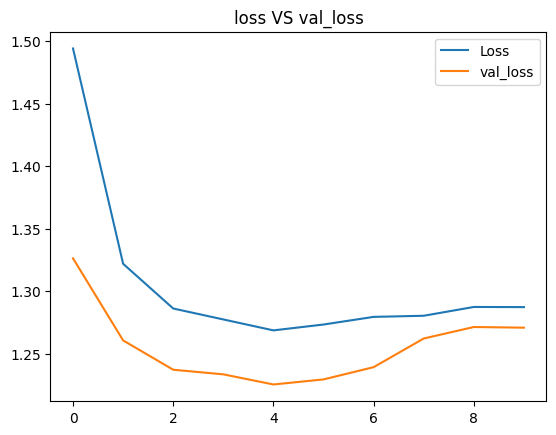

In [ ]:
#plot loss per iteration
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('loss VS val_loss')
plt.legend()

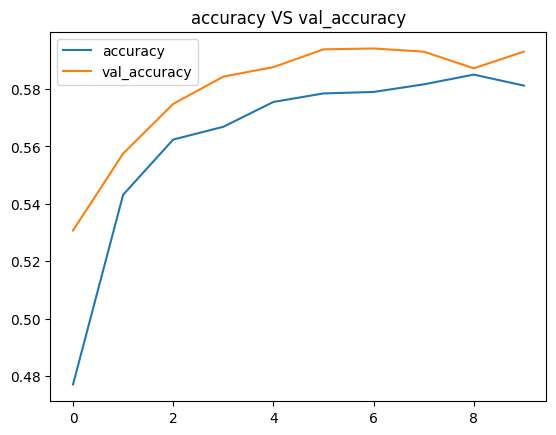

In [ ]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.title('accuracy VS val_accuracy')
plt.legend()

In [ ]:
#refference model

x = Flatten()(vgg.output)
prediction = Dense(10, activation = 'softmax')(x)
ref_vgg_udemy = Model(inputs = vgg.input, outputs = prediction)


In [ ]:
ref_vgg_udemy.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0   

In [ ]:
ref_vgg_udemy.compile(loss='categorical_crossentropy', optimizer = 'rmsprop', metrics = 'accuracy')

In [ ]:
history_vgg_udemy = ref_vgg_udemy.fit(x_train,categorical_y_train, epochs=10, validation_data=(x_test,categorical_y_test))

Epoch 1/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1631 - accuracy: 0.6042 - val_loss: 1.2194 - val_accuracy: 0.5834
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1597 - accuracy: 0.6059 - val_loss: 1.2220 - val_accuracy: 0.5864
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 1.1570 - accuracy: 0.6056 - val_loss: 1.2201 - val_accuracy: 0.5816
Epoch 4/10
1563/1563 [==============================] - 13s 8ms/step - loss: 1.1557 - accuracy: 0.6056 - val_loss: 1.2185 - val_accuracy: 0.5819
Epoch 5/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1528 - accuracy: 0.6074 - val_loss: 1.2205 - val_accuracy: 0.5825
Epoch 6/10
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1510 - accuracy: 0.6084 - val_loss: 1.2238 - val_accuracy: 0.5816
Epoch 7/10
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1502 - accuracy: 0.6097 - val_loss: 1.2177 - val_ac

In [ ]:
#Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

y_pred = ref_vgg_udemy.predict(x_test).argmax(axis = 1)


313/313 [==============================] - 1s 4ms/step


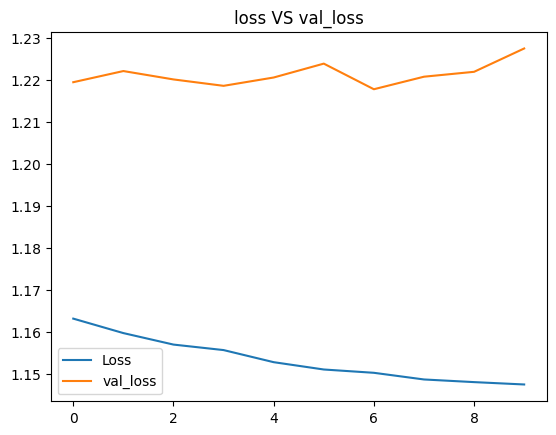

In [ ]:
#plot loss per iteration
plt.plot(history_vgg_udemy.history['loss'], label = 'Loss')
plt.plot(history_vgg_udemy.history['val_loss'], label = 'val_loss')
plt.title('loss VS val_loss')
plt.legend()

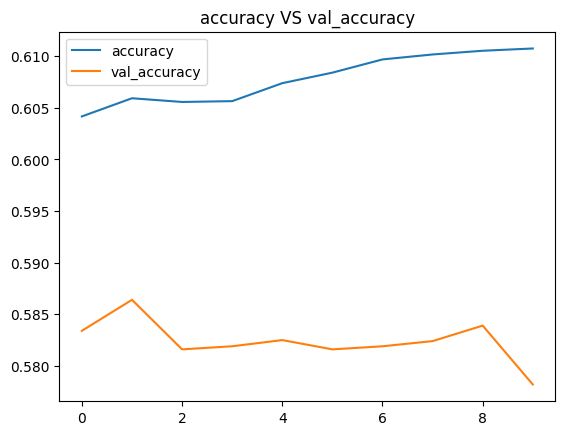

In [ ]:
plt.plot(history_vgg_udemy.history['accuracy'], label = 'accuracy')
plt.plot(history_vgg_udemy.history['val_accuracy'], label = 'val_accuracy')
plt.title('accuracy VS val_accuracy')
plt.legend()

<Axes: >

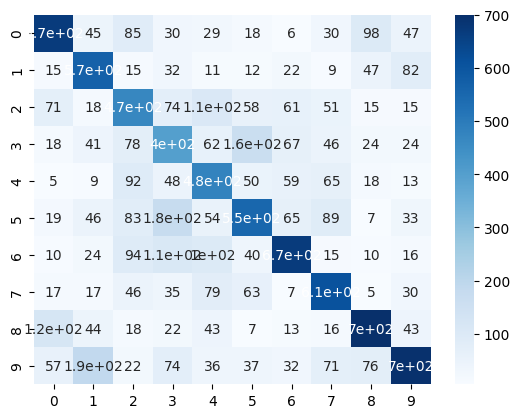

In [ ]:
cm = confusion_matrix(y_pred,y_test)
disp = ConfusionMatrixDisplay(cm)
import seaborn as sns
sns.heatmap(cm, annot = True,cmap='Blues')

In [ ]:
#Label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

Text(0.5, 1.0, 'True label: airplane ; Prediction: truck')

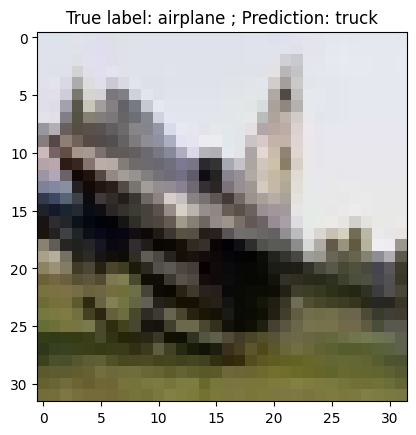

In [ ]:
#show some misclassified example
mis_ind = np.where(y_pred != y_test)[0]
i = np.random.choice(mis_ind)
plt.imshow(x_test[i])
plt.title('True label: %s ; Prediction: %s'%( labels[y_test[i]], labels[y_pred[i]]))

In [ ]:
mis_ind

array([   3,    6,    7, ..., 9994, 9995, 9998])